In [91]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# CometML Setup
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [92]:
from comet_ml import Experiment

In [93]:
experiment = Experiment(
    api_key='EGo0DLyTS7H0IcSjgcNsVFtO9',
    project_name='medical-appointment',
    workspace='deezzir',
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/deezzir/medical-appointment/892588197e124bd7a3f05a21253c56c8



# Загрузка данных

In [94]:
df = pd.read_csv('Data/KaggleV2-May-2016.csv')

In [95]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Visualization

### Distribution

{'web': 'https://www.comet.ml/api/image/download?imageId=ed4fc208784a41828aa589e29d087435&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=ed4fc208784a41828aa589e29d087435&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'imageId': 'ed4fc208784a41828aa589e29d087435'}

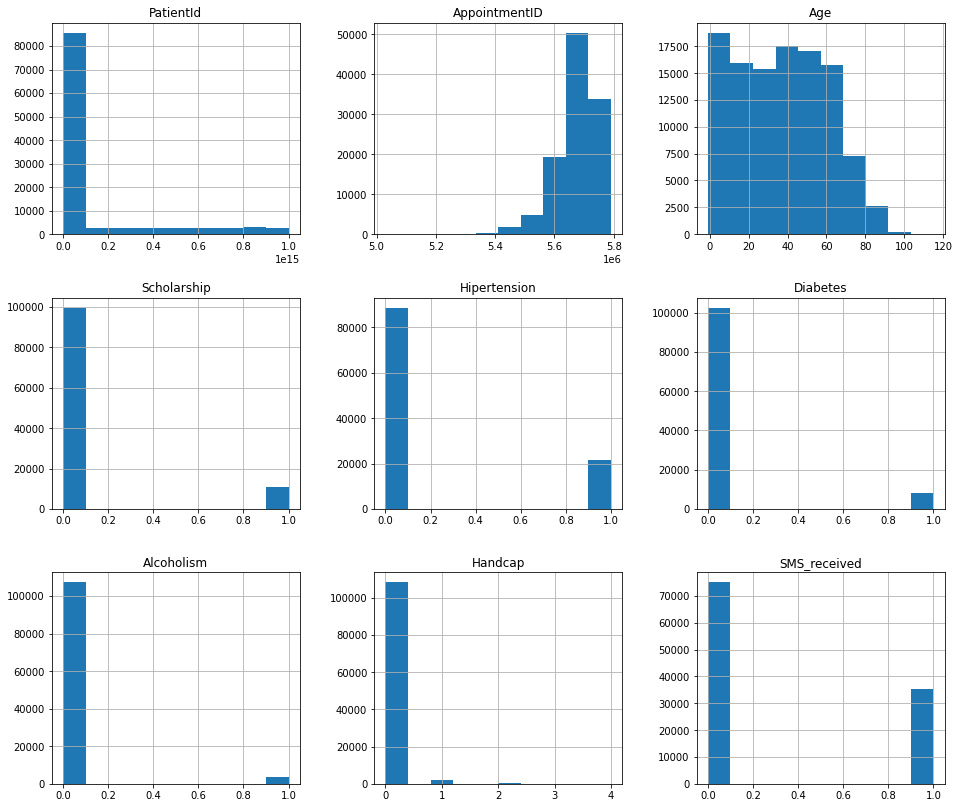

In [96]:
df.hist(figsize=(16,14));
experiment.log_figure(figure=plt)

In [97]:
print("Unique value in `Age` => {}".format(df.Age.unique()))

df = df[(df.Age >= 0) & (df.Age <= 110)]
#df.Age.value_counts()

Unique value in `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


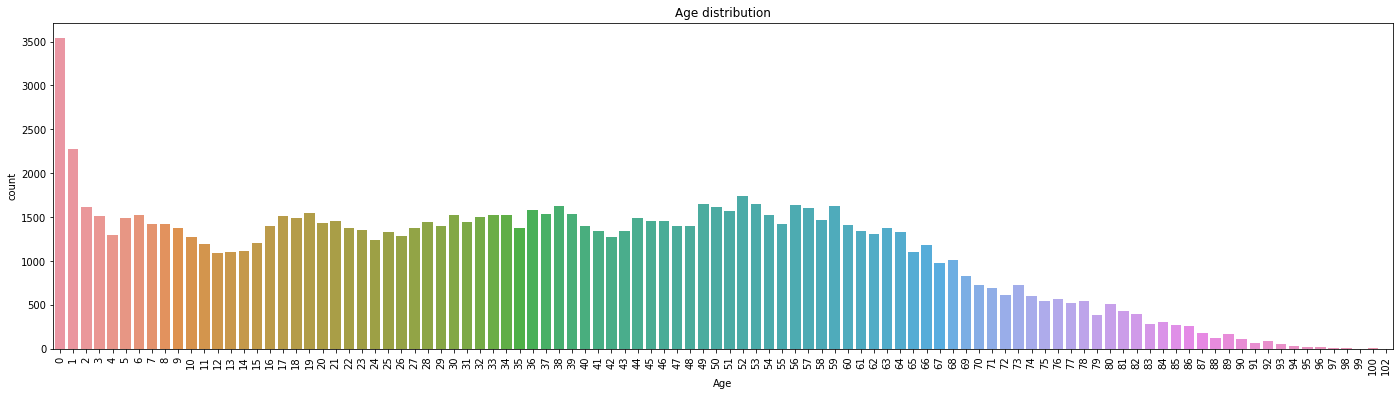

In [98]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Age distribution")
experiment.log_figure(figure=plt)
plt.show()

# Will the patient come to the appointment?

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 16.7+ MB


## Encoding

In [100]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y = df['No-show']
y = y.replace({'No': 0, 'Yes': 1})
y.value_counts(True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

## Scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

# ML Model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Initialization

In [105]:
logreg = LogisticRegression()
random_state = 42

### Learning

In [106]:
logreg.fit(X, y)

/Users/deezzir/opt/anaconda3/envs/sf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### Loging the parameters

In [107]:
params={"random_state":random_state,
        "model_type":"logreg"
}

experiment.log_parameters(params)

### Prediction

In [108]:
y_pred = logreg.predict(X)

### Analysis

In [109]:
accuracy = accuracy_score(y, y_pred)

print("Accuraccy: {:6.3f}".format(accuracy))

Accuraccy:  0.798


# Loging the metrics

<img src = 'https://miro.medium.com/max/1400/0*r2yYhe2DpE4d3WKP.png' width=700px>

In [110]:
metrics = {"accuracy":accuracy}

experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.ml/api/asset/download?assetId=42ae6308b9fa43d780582633636d8db6&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=42ae6308b9fa43d780582633636d8db6&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'assetId': '42ae6308b9fa43d780582633636d8db6'}

# Homework

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

In [111]:
import plotly.express as px
import plotly.figure_factory as ff

In [112]:
cropped = encoded_columns[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]

corr = cropped.corr()

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),
    xgap=3, ygap=3,
    zmin=1, zmax=-1,
    colorscale='RdBu_r',
    colorbar_thickness=30,
    colorbar_ticklen=3
)
fig.update_layout(
    width=8e2,
    height=6e2,
    title='Correlation Heatmap',
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis={'side': 'bottom'},
    yaxis_autorange='reversed'
)
fig.show()
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.ml/api/image/download?imageId=afe62c0dbfdd4c809402f2e5043db35c&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=afe62c0dbfdd4c809402f2e5043db35c&experimentKey=892588197e124bd7a3f05a21253c56c8',
 'imageId': 'afe62c0dbfdd4c809402f2e5043db35c'}

<hr>

In [113]:
experiment.display()

In [114]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/deezzir/medical-appointment/892588197e124bd7a3f05a21253c56c8
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : 4